Natural language is a broad term but you can consider it to cover any of the following:

- Text (such as that contained in an email, blog post, book, Tweet)
- Speech (a conversation you have with a doctor, voice commands you give to a smart speaker)
- 
Under the umbrellas of text and speech there are many different things you might want to do.

If you're building an email application, you might want to scan incoming emails to see if they're spam or not spam (classification).

If you're trying to analyse customer feedback complaints, you might want to discover which section of your business they're for.

- **🔑 Note:** Both of these types of data are often referred to as sequences (a sentence is a sequence of words). So a common term you'll come across in NLP problems is called seq2seq, in other words, finding information in one sequence to produce another sequence (e.g. converting a speech command to a sequence of text-based steps).

To get hands-on with NLP in TensorFlow, we're going to practice the steps we've used previously but this time with text data:

Text -> turn into numbers -> build a model -> train the model to find patterns -> use patterns (make predictions)

- **What we're going to cover**

1. Downloading a text dataset
2. Visualizing text data
3. Converting text into numbers using tokenization
4. Turning our tokenized text into an embedding
5. Modelling a text dataset
6. Starting with a baseline (TF-IDF)
7. Building several deep learning text models
    - Dense, LSTM, GRU, Conv1D, Transfer learning
8. Comparing the performance of each our models
9. Combining our models into an ensemble
10. Saving and loading a trained model
11. Find the most wrong predictions

**Downloading the Dataset**

In [1]:
# import requests
# import zipfile

# # Step 1: Download the file
# url = "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"
# response = requests.get(url)
# zip_file_path = "nlp_getting_started.zip"
# with open(zip_file_path, "wb") as file:
#     file.write(response.content)

# # Step 2: Extract the zip file
# with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
#     zip_ref.extractall("extracted_files")  # Extract to a folder

### Preparing  The Model Data .

In [2]:
import pandas as pd 

train_df = pd.read_csv("extracted_files/train.csv")
test_df = pd.read_csv("extracted_files/test.csv")

In [3]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


**Shuffling our Dataset** 

In [5]:
train_df = train_df.sample(frac=1 , random_state=50)
train_df.head()

,id,keyword,location,text,target
3931,5589,flood,NaN,Internet basics: the flood defective intertiss...,1
1036,1502,body%20bags,D.C. - Baltimore - Annapolis,UPDATE: Va. firefighter on administrative leav...,0
4223,5998,hazardous,"British Columbia, Canada",Skinny Jeans are Hazardous for Your Health! #s...,1
6831,9783,trapped,Puerto Rico,Hollywood Movie About Trapped Miners Released ...,1
2032,2916,danger,"Brooklyn, NY",My take away: preservation parks r an impositi...,0


**Splitting data into Training and Validation data**

In [6]:
import sklearn 
from sklearn.model_selection import train_test_split 

train_sentences , val_sentences , train_labels , val_labels = train_test_split(train_df["text"].to_numpy() ,
                                                                                  train_df["target"].to_numpy(), 
                                                                                  test_size=0.1,
                                                                                  random_state=50)

In [7]:
train_sentences.shape , val_sentences.shape , train_labels.shape , val_labels.shape

((6851,), (762,), (6851,), (762,))

In [8]:
train_sentences[:10]

array(['Kirsten Gillibrand http://t.co/amEA3LaMDj    Extend Health Care To 911 First RESPONDERS !',
       '#Civilian casualties in Afghanistan hit highest number since 2009 U.N. says via @WashingtonPost - http://t.co/xTF5DvgRvh',
       'Christian Attacked by Muslims at the Temple Mount after Waving Israeli Flag via Pamela Geller - ... http://t.co/wGWiQmICL1',
       'Lose bus card.\nPanic.\nKind bus driver.\nReplace bus card.\nFind bus card.\nHeaddesk.',
       'The government is concerned about the population explosion and the population is concerned about the government explosion. - Joe Moore',
       'Deputies: Dog dispute leads to fatal shooting in Person County http://t.co/OazgHoZGYa #gunfail #nra',
       '#SanDiego #News Sinkhole Disrupts Downtown Trolley Service: The incident happened Wed... http://t.co/RVMMuT3GvC #Algeria #???????',
       "'Seismic' Apple TV service to stream 25 channels across all d... http://t.co/zqMtrBKaS0 | https://t.co/YEqq3BZX3g http://t.co/kmVrZaSXY4

### Tokenization / Embedding

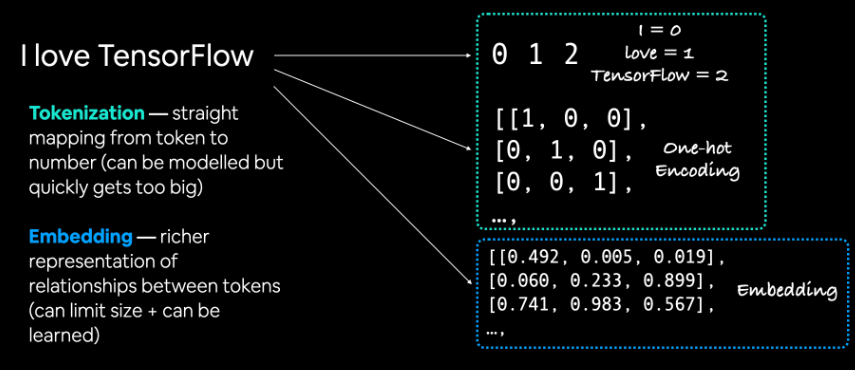

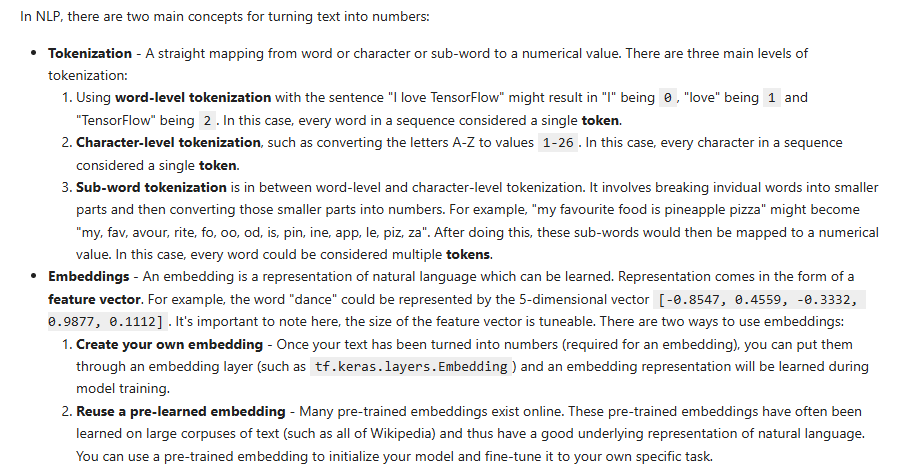

**Converting text into numbers**

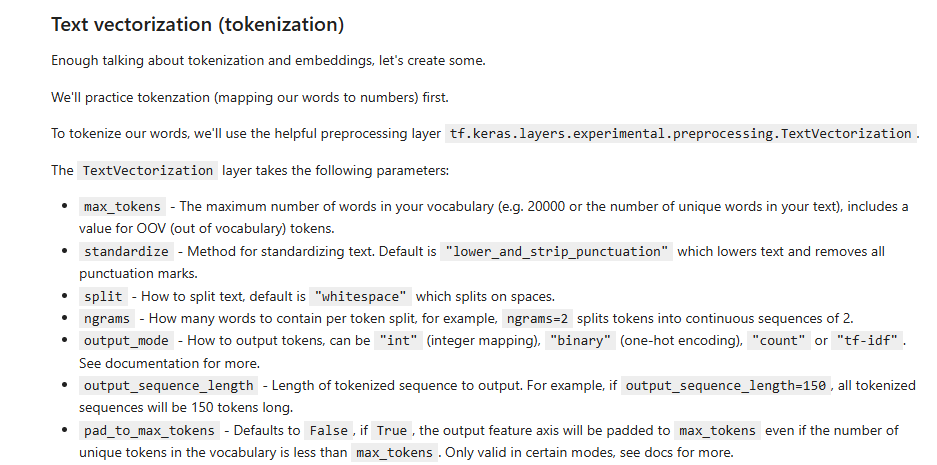

<pre>
    tf.keras.layers.TextVectorization(
    max_tokens=None,
    standardize='lower_and_strip_punctuation',
    split='whitespace',
    ngrams=None,
    output_mode='int',
    output_sequence_length=None,
    pad_to_max_tokens=False,
    vocabulary=None,
    idf_weights=None,
    sparse=False,
    ragged=False,
    encoding='utf-8',
    name=None,
    **kwargs
)
</pre>


##
### `max_tokens`
- **Description**: Maximum size of the vocabulary for this layer.  
- **Usage**: 
  - This should only be specified when adapting a vocabulary or when setting `pad_to_max_tokens=True`.
  - Note: The vocabulary contains 1 OOV token, so the effective number of tokens is `(max_tokens - 1 - (1 if output_mode == "int" else 0))`.
##
---

### `standardize`
- **Description**: Optional specification for standardization to apply to the input text.  
- **Values**:
  - `None`: No standardization.
  - `"lower_and_strip_punctuation"`: Text will be lowercased and all punctuation removed.
  - `"lower"`: Text will be lowercased.
  - `"strip_punctuation"`: All punctuation will be removed.
  - `Callable`: Inputs will be passed to the callable function, which should standardize and return t## he text.

---

### `split`
- **Description**: Optional specification for splitting the input text.  
- **Values**:
  - `None`: No splitting.
  - `"whitespace"`: Split on whitespace.
  - `"character"`: Split on each Unicode character.
  - `Callable`: Standardized inputs will be passed to the callable function, which should split an## d return the text.

---

### `ngrams`
- **Description**: Optional specification for ngrams to create from the possibly-split input text.  
- **Values**:
  - `None`: No ngrams will be created.
  - `Integer`: Create ngrams up to the specified integer value.
  - `Tuple of integers`: Create ngrams for the spe## cified values in the tuple.

---

### `output_mode`
- **Description**: Optional specification for the output of the layer.  
- **Values**:
  - `"int"`:
    - Outputs integer indices, one integer index per split string token.
    - When `output_mode == "int"`, 0 is reserved for masked locations, reducing the vocab size to `max_tokens - 2` instead of `max_tokens - 1`.
  - `"multi_hot"`:
    - Outputs a single int array per batch, of either `vocab_size` or `max_tokens` size.
    - Contains `1`s in all elements where the token mapped to that index exists at least once in the batch item.
  - `"count"`:
    - Similar to `"multi_hot"`, but the int array contains a count of the number of times the token at that index appeared in the batch item.
  - `"tf_idf"`:
    - Similar to `"multi_hot"`, but the TF-IDF algorithm is applied to compute the value in each token slot.

- **Notes**:
  - For `"int"` output: Any shape of input and output is supported.
  - For other output modes: Only rank 1 inputs (and##  rank 2 outputs after splitting) are supported.

---

### `output_sequence_length`
- **Description**: Only valid in `INT` mode.  
- **Usage**:
  - If set, the output will have its time dimension padded or truncated to exactly `output_sequence_length` values, resulting in a tensor of shape `(batch_size, output_sequence_length)` regardless of how many tokens resulted from the splitting step.
  - Defaults to `None`.
  - If `ragged` is `T, then `output_sequence_length` may still truncate the output.
```

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

text_vectorizer = TextVectorization(max_tokens=None ,  # how many words in the vocabulary (all of the different words in your text)
                                   standardize="lower_and_strip_punctuation",  # how to process text
                                   split="whitespace", # how to split tokens
                                   ngrams=None,  # create groups of n-words?
                                   output_mode='int',  # how to map tokens to numbers
                                   output_sequence_length = None)  # how long should the output sequence of tokens be?

We've initialized a TextVectorization object with the default settings but let's customize it a little bit for our own use case.

In particular, let's set values for max_tokens and output_sequence_length.

For max_tokens (the number of words in the vocabulary), multiples of 10,000 (10,000, 20,000, 30,000) or the exact number of unique words in your text (e.g. 32,179) are common values.

For our use case, we'll use 10,000.

And for the output_sequence_length we'll use the average number of tokens per Tweet in the training set. But first, we'll need to find it.

In [10]:
# Find average number of tokens (words) in training Tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [11]:
# Setup text vectorization with custom variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [12]:
# Fit the text vectorizer to the training text 
text_vectorizer.adapt(train_sentences)

**adapt()** : 
Fits the TextVectorization layer to a dataset to learn the vocabulary.

This method scans through the input data to determine the unique tokens and 
their frequency, building the vocabulary based on the specified configuration
(e.g., `max_tokens`, `standardize`, `ngrams`, etc.). It prepares the layer 
for tokenization and vectorization of text inputs.

Args:
    data (Iterable or tf.data.Dataset): 
        The input data to adapt the layer on. 
        - Can be a list, array, or TensorFlow dataset of strings.
        - Each element represents a text sample (e.g., sentences or documents).

Behavior:
    - Applies standardization (e.g., lowercasing, stripping punctuation) 
      if specified in the layer configuration.
    - Splits input text into tokens based on the specified `split` mode 
      (e.g., whitespace, characters, or a custom callable).
    - Builds a vocabulary by analyzing the tokens and keeping the most 
      frequent `max_tokens` tokens if specified.
    - Reserves special tokens like the "Out-of-Vocabulary" (OOV) token.

In [13]:
# creating a sample sentence and tokenize it 
sample_sentence = "There is a flood in my street!" 
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 75,   9,   3, 241,   4,  13, 703,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [14]:
import random
# choose a random sentence from the training dataset and tokenize it 
random_sentence = random.choice(train_sentences)
print("Original Sentence : " , random_sentence ,"\n Vector :")
text_vectorizer([random_sentence])

Original Sentence :  Smoke ave streets hottest youngins 
 Vector :


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 257, 1145, 1762,    1, 6504,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [15]:
words_in_vocab = text_vectorizer.get_vocabulary()

In [16]:
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}") 
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
Top 5 most common words: ['', '[UNK]', np.str_('the'), np.str_('a'), np.str_('in')]
Bottom 5 least common words: [np.str_('owenrbroadhurst'), np.str_('owen'), np.str_('overåÊhostages'), np.str_('overzero'), np.str_('overwhelming')]


### Creating an Embedding using an Embedding Layer

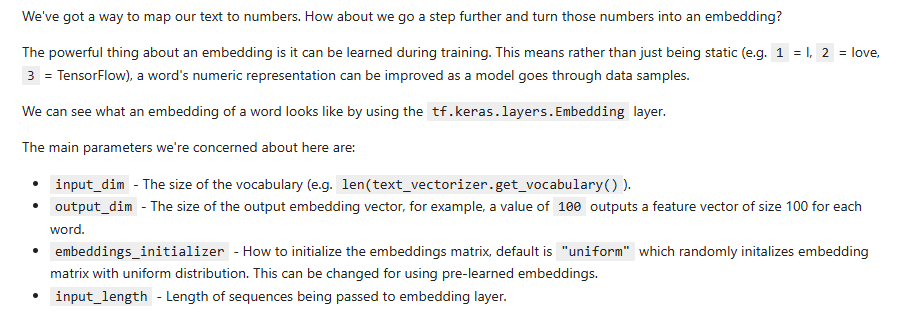

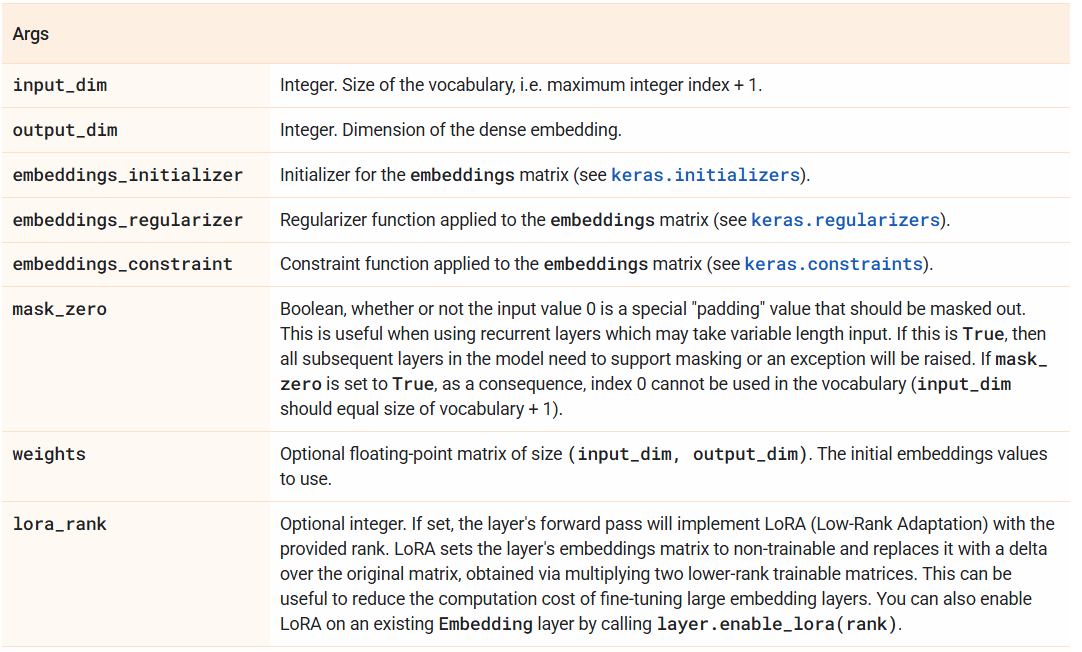

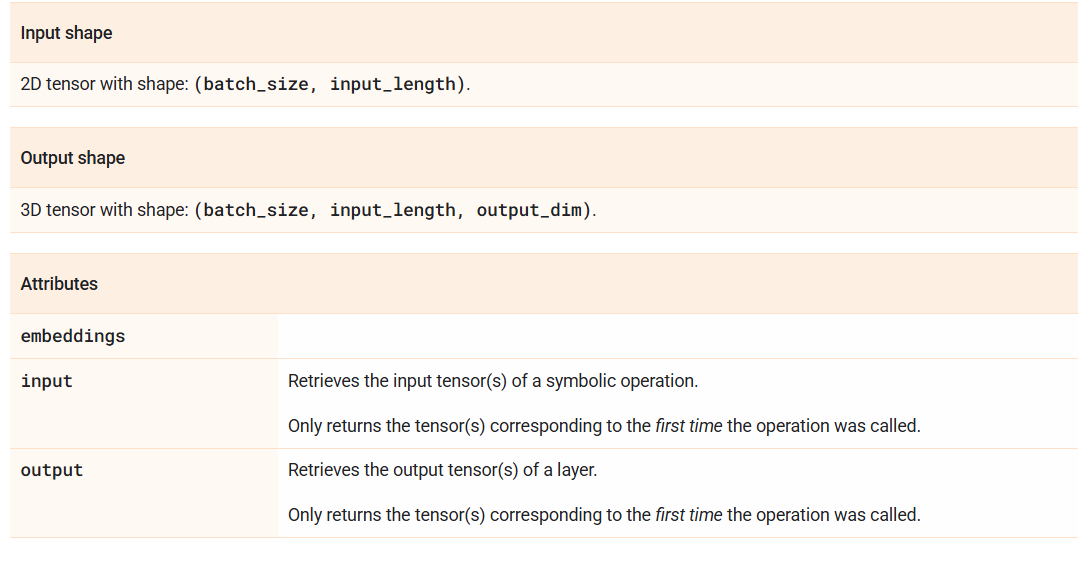

In [17]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(
    input_dim= max_vocab_length , 
    output_dim= 128 
)
embedding

<Embedding name=embedding, built=False>

- Excellent, notice how embedding is a TensoFlow layer? This is important because we can use it as part of a model, meaning its parameters (word representations) can be updated and improved as the model learns.

In [18]:
random_sentence = random.choice(train_sentences)

print("Original Sentence : ", random_sentence , "\n\nEmbedded Vector : ")
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original Sentence :  The 46 returned refugees - what were they fleeing from &amp; how will the Vietnamese Govt treat them now they are returned? #Dutton #presser 

Embedded Vector : 


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.02053955, -0.00884386,  0.02000437, ..., -0.0462999 ,
          0.02222833,  0.03534723],
        [ 0.00910515,  0.02287097, -0.03908318, ..., -0.01406021,
         -0.00913618, -0.0160384 ],
        [-0.01672983, -0.0497617 , -0.00778623, ...,  0.04227597,
         -0.04949573, -0.04020251],
        ...,
        [-0.02053955, -0.00884386,  0.02000437, ..., -0.0462999 ,
          0.02222833,  0.03534723],
        [-0.03572607,  0.03877399, -0.02083107, ..., -0.03610978,
         -0.0466897 , -0.02621911],
        [ 0.0221786 ,  0.02286234,  0.00285106, ..., -0.03717554,
          0.03692974, -0.04042405]]], dtype=float32)>

In [19]:
# check out a single token's embedding 
sample_embed[0][0] , sample_embed[0][0].shape

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([-0.02053955, -0.00884386,  0.02000437,  0.0313652 ,  0.04045263,
         0.00456978,  0.02637161, -0.03961527, -0.01252824,  0.02273644,
        -0.01231611, -0.03373163, -0.02300702,  0.04676269, -0.01285151,
        -0.04948254, -0.01547774, -0.04157791, -0.01913546, -0.00088906,
         0.01569973, -0.03919876,  0.03063217, -0.00965529, -0.03612436,
         0.03038999, -0.02370482, -0.03190441,  0.02898795,  0.02605559,
        -0.00536986,  0.02852278, -0.01552067,  0.04729899,  0.03133643,
        -0.01780128,  0.04947526, -0.01064799,  0.00750402, -0.0038114 ,
        -0.01431383,  0.01686383, -0.03214591,  0.02210344,  0.01045899,
         0.0061268 ,  0.02774967,  0.00015949, -0.03450965, -0.0287894 ,
        -0.02085483,  0.01101664, -0.02373694,  0.04000105, -0.0420839 ,
        -0.02667677,  0.04565138,  0.00031156,  0.02948863,  0.01546409,
         0.04616951, -0.01872674, -0.00028656, -0.00813742,  0.0453716 ,
  

### Modelling a text dataset

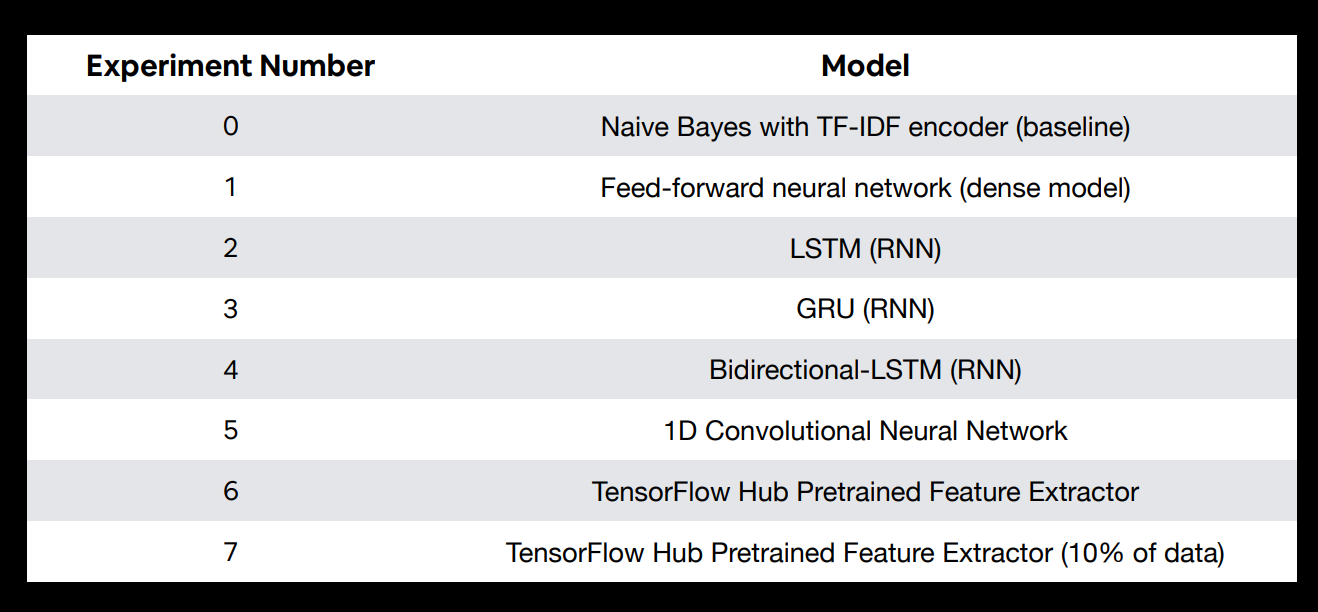

To get plenty of practice, we're going to build a series of different models, each as its own experiment. We'll then compare the results of each model and see which one performed best.

More specifically, we'll be building the following:

- Model 0: Naive Bayes (baseline)
- Model 1: Feed-forward neural network (dense model)
- Model 2: LSTM model
- Model 3: GRU model
- Model 4: Bidirectional-LSTM model
- Model 5: 1D Convolutional Neural Network
- Model 6: TensorFlow Hub Pretrained Feature Extractor
- Model 7: Same as model 6 with 10% of training data

Model 0 is the simplest to acquire a baseline which we'll expect each other of the other deeper models to beat.

**Each experiment will go through the following steps:**

- Construct the model
- Train the model
- Make predictions with the model
- Track prediction evaluation metrics for later comparison
  
Let's get started.

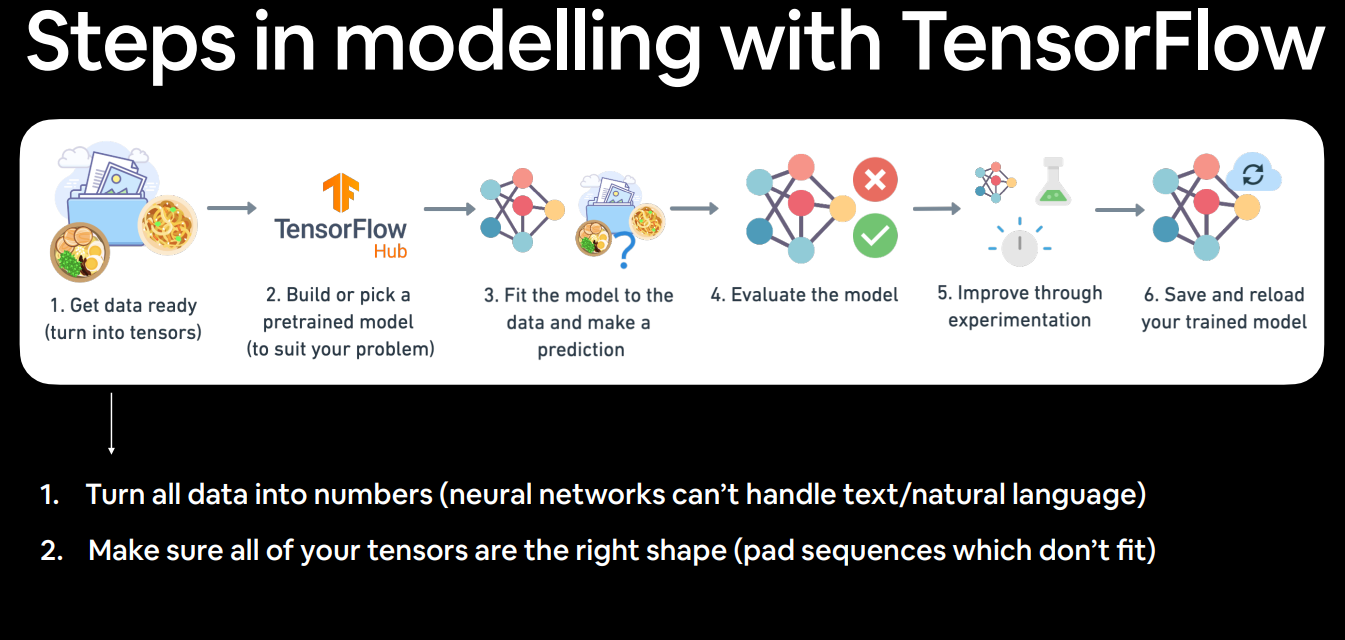

#### Model-0 :  Naive  Bayes

As with all machine learning modelling experiments, it's important to create a baseline model so you've got a benchmark for future experiments to build upon.

To create our baseline, we'll create a Scikit-Learn Pipeline using the TF-IDF (term frequency-inverse document frequency) formula to convert our words to numbers and then model them with the Multinomial Naive Bayes algorithm. 

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.pipeline import Pipeline 

# Create tokenization and modelling pipeline 
model_0 = Pipeline([
    ("tfidf" , TfidfVectorizer()), # Convert Words to Numbers using tfidf 
    ("clf" , MultinomialNB()) # Model the Text 
])

# Fit the pipeline  to the training data 
model_0.fit(train_sentences , train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [21]:
# Evaluate Our Baseline Model 
baseline_score = model_0.score(val_sentences , val_labels)
print(f"Accuracy : {baseline_score*100:.2f}" )

Accuracy : 77.95


**Evaluating Our Model**

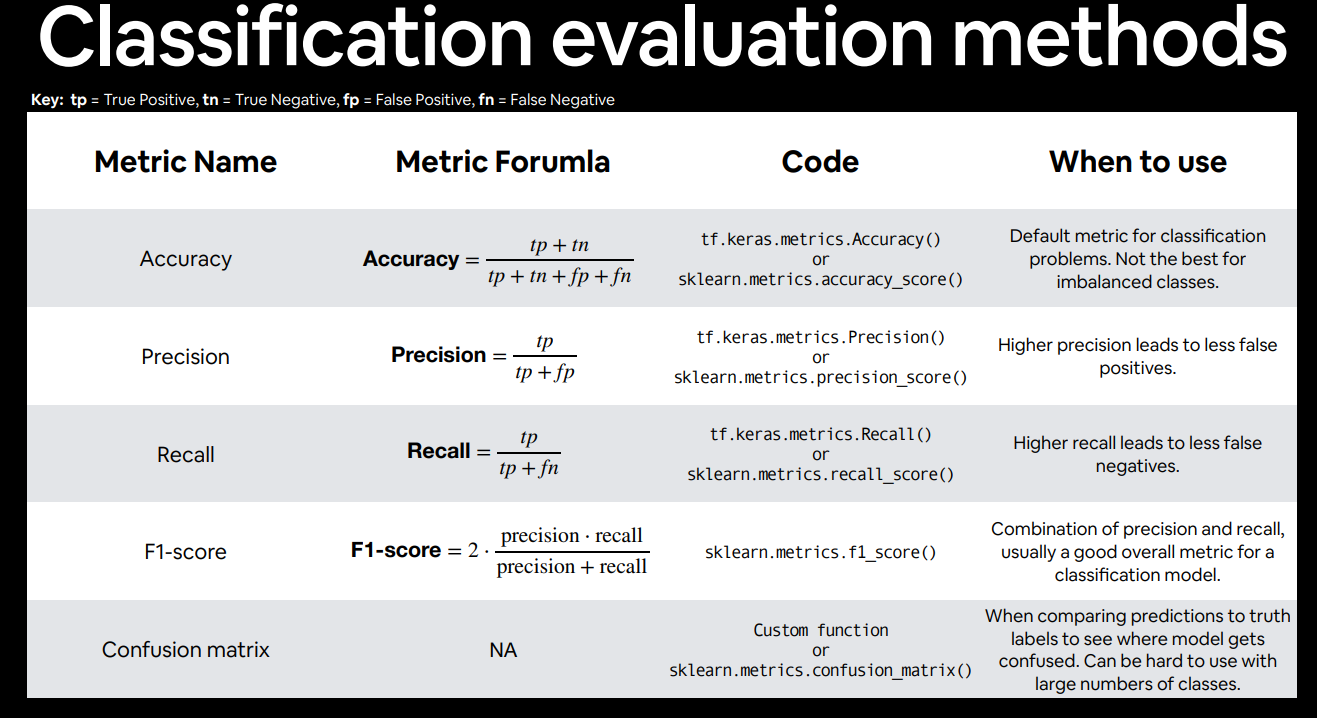

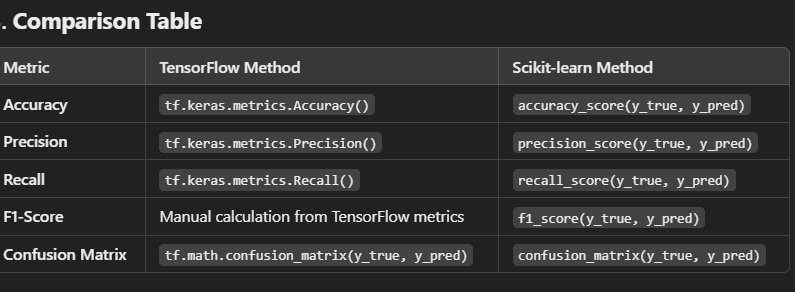

In [22]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score  , accuracy_score

def evaluation_metrics_sklearn(model , test_pred , test_labels) : 
    accuracy = accuracy_score(test_labels , test_pred)
    precision = precision_score(test_labels, test_pred)
    recall = recall_score(test_labels , test_pred)
    f1= f1_score(test_labels , test_pred)
    confusion = confusion_matrix(test_labels , test_pred)
    results = {
        "Accuracy" : accuracy , 
        "Recall" : recall , 
        "Precision" : precision , 
        "F1-Score" : f1 , 
        "Confusion Matrix" : confusion
    }
    return results

In [23]:
val_pred = model_0.predict(val_sentences)
model_0_results = evaluation_metrics_sklearn(model_0 , val_pred , val_labels)
model_0_results

{'Accuracy': 0.7795275590551181,
 'Recall': 0.6050420168067226,
 'Precision': 0.8888888888888888,
 'F1-Score': 0.72,
 'Confusion Matrix': array([[378,  27],
        [141, 216]])}

In [24]:
def evaluation_metrics_tf(model , test_pred , test_labels) : 
    accuracy = tf.keras.metrics.Accuracy()
    precision = tf.keras.metrics.Precision()
    recall = tf.keras.metrics.Recall()

    # Updating state 
    accuracy.update_state(test_pred , test_labels)
    precision.update_state(test_pred , test_labels)
    recall.update_state(test_pred , test_labels)

    # Evaluate Scores
    accuracy_score = accuracy.result().numpy()
    precision_score = precision.result().numpy()
    recall_score = recall.result().numpy()
    f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score + 1e-7)
    confusion_matrix_tf = tf.math.confusion_matrix(test_labels , test_pred)

    # Results Disctionary 
    results = {
        "Accuracy" : accuracy_score , 
        "Recall" : recall_score , 
        "Precision" : precision_score , 
        "F1-Score" : f1_score , 
        "Confusion Matrix" : confusion_matrix_tf
    }

    return results

#### Model-1 : A simple Dense Model 

The first "deep" model we're going to build is a single layer dense model. In fact, it's barely going to have a single layer.

It'll take our text and labels as input, tokenize the text, create an embedding, find the average of the embedding (using Global Average Pooling) and then pass the average through a fully connected layer with one output unit and a sigmoid activation function.

If the previous sentence sounds like a mouthful, it'll make sense when we code it out (remember, if in doubt, code it out).

And since we're going to be building a number of TensorFlow deep learning models, we'll import our create_tensorboard_callback() function from helper_functions.py to keep track of the results of each.

In [25]:
from helper_functions import create_tensorboard_callback 

# Create a Directory to save TensorBoard Logs 
SAVE_DIR = "model_logs"

In [26]:
# Building the Model 
from tensorflow.keras import layers 
inputs = layers.Input(shape=(1,) , dtype=tf.string) # Inputs are 1- dimensional strings 
x = text_vectorizer(inputs) # turn the input text into numbers 
x = embedding(x) # Create an embedding of the numberized  inputs 
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding 
outputs = layers.Dense(1 , activation="sigmoid")(x) # create the output layer, want binary outputs so use sigmoid activation
model_1 = tf.keras.Model(inputs , outputs , name ="model_1")


In [27]:
model_1.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,280,129 (4.88 MB)

 Trainable params: 1,280,129 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Compiling the Model 
model_1.compile(
 loss= tf.keras.losses.binary_crossentropy, 
 optimizer= tf.keras.optimizers.Adam() ,
 metrics=["accuracy"]
)

In [29]:
# Fitting the Model 
model_1_history = model_1.fit(x=train_sentences ,
                             y=train_labels , 
                             epochs=5 , 
                             validation_data=(val_sentences , val_labels),
                             callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR ,
                                                                   experiment_name="model_1_dense")])

Saving TensorBoard log files to: model_logs/model_1_dense/20250113-194640
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.6539 - loss: 0.6469 - val_accuracy: 0.7507 - val_loss: 0.5322
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8125 - loss: 0.4685 - val_accuracy: 0.7861 - val_loss: 0.4631
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8579 - loss: 0.3647 - val_accuracy: 0.7966 - val_loss: 0.4510
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8833 - loss: 0.2979 - val_accuracy: 0.7927 - val_loss: 0.4585
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9086 - loss: 0.2483 - val_accuracy: 0.8005 - val_loss: 0.4762


In [30]:
model_1.evaluate(val_sentences , val_labels)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8052 - loss: 0.4817


[0.47616448998451233, 0.8005249500274658]

In [31]:
# Make some predictions and evaluate those 
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


(762, 1)

In [32]:
model_1_pred_probs

array([[1.48051322e-01],
       [3.75399202e-01],
       [1.89201474e-01],
       [8.88636827e-01],
       [1.83553711e-01],
       [5.40768981e-01],
       [3.82161647e-01],
       [6.60862327e-01],
       [7.21936524e-02],
       [1.46943331e-01],
       [4.82704014e-01],
       [5.07308841e-01],
       [9.85434428e-02],
       [9.22813892e-01],
       [5.52779548e-02],
       [4.17558610e-01],
       [4.29557800e-01],
       [8.87929440e-01],
       [9.92490411e-01],
       [8.64502907e-01],
       [8.66641384e-03],
       [8.25037837e-01],
       [9.98804212e-01],
       [9.97803748e-01],
       [7.76222572e-02],
       [2.26420105e-01],
       [1.62019342e-01],
       [1.74160153e-01],
       [9.60030496e-01],
       [2.95197189e-01],
       [1.96155280e-01],
       [9.99552071e-01],
       [5.58717549e-02],
       [7.76893675e-01],
       [1.68183744e-01],
       [9.12311152e-02],
       [3.18524018e-02],
       [9.92107630e-01],
       [3.07643950e-01],
       [9.60206330e-01],


In [33]:
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
pd.DataFrame(model_1_preds).value_counts()

0  
0.0    451
1.0    311
Name: count, dtype: int64

In [34]:
model_1_results = evaluation_metrics_tf(model= model_1 , test_pred= model_1_preds , test_labels=val_labels)
model_1_results

{'Accuracy': np.float32(0.80052495),
 'Recall': np.float32(0.829582),
 'Precision': np.float32(0.7226891),
 'F1-Score': np.float32(0.77245504),
 'Confusion Matrix': <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[352,  53],
        [ 99, 258]], dtype=int32)>}

In [35]:
model_0_results , model_1_results

({'Accuracy': 0.7795275590551181,
  'Recall': 0.6050420168067226,
  'Precision': 0.8888888888888888,
  'F1-Score': 0.72,
  'Confusion Matrix': array([[378,  27],
         [141, 216]])},
 {'Accuracy': np.float32(0.80052495),
  'Recall': np.float32(0.829582),
  'Precision': np.float32(0.7226891),
  'F1-Score': np.float32(0.77245504),
  'Confusion Matrix': <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
  array([[352,  53],
         [ 99, 258]], dtype=int32)>})

**Visualizing Embedding Vector**

### Model-2  : RNN Cell => LSTM 

**Recurrent Neural Networks (RNNs)**

For our next series of modeling experiments, we're going to be using a special kind of neural network called a **Recurrent Neural Network (RNN)**.

The premise of an RNN is simple: **use information from the past to help you with the future** (this is where the term "recurrent" comes from). In other words, take an input (X) and compute an output (y) based on all previous inputs.

This concept is especially helpful when dealing with **sequences**, such as passages of natural language text (e.g., our Tweets).

---

**Example of Sequential Context**
For example, when you read this sentence, you take into context the previous words when deciphering the meaning of the current word **dog**.

See what happened there?

I put the word "dog" at the end, which is a valid word, but it doesn't make sense in the context of the rest of the sentence.

---

**How RNNs Work with Sequences**
When an RNN looks at a sequence of text (already in numerical form), the patterns it learns are continually updated based on the order of the sequence.

Take a simple example with two sentences:
1. **Massive earthquake last week, no?**
2. **No massive earthquake last week.**

Both sentences contain the exact same words but have different meanings. The **order of the words** determines the meaning (punctuation also plays a role, but we'll focus on the words here).

---

**Applications of RNNs**
Recurrent neural networks can be used for a variety of sequence-based problems:

1. **One to One**: One input, one output, such as image classification.
2. **One to Many**: One input, many outputs, such as image captioning (image input, a sequence of text as caption output).
3. **Many to One**: Many inputs, one output, such as text classification (e.g., classifying a Tweet as a real disaster or not a real disaster).
4. **Many to Many**: Many inputs, many outputs, such as:
   - **Machine Translation**: Translating English to Spanish.
   - **Speech to Text**: Audio wave as input, text as output.

---

**Common RNN Variants**
When you come across RNNs in the wild, you'll likely encounter the following variants:
1. **Long Short-Term Memory cells (LSTMs)**.
2. **Gated Recurrent Units (GRUs)**.
3. **Bidirectional RNNs**: Pass forward and backward along a sequence (left to right and right to left).

Going into the details of each of these is beyond the scope of this notebook (we're going to focus on using them instead). The main takeaway is that these methods have proven very effective for modeling sequences.

---

**📖 Resources for Further Learning**
If you'd like to dive deeper into the theory behind RNNs and their variants, check out these resources:
- **[MIT Deep Learning Lecture on Recurrent Neural Networks](https://youtube.com)**: Explains the background of recurrent neural networks and introduces LSTMs.
- **[The Unreasonable Effectiveness of Recurrent Neural Networks by Andrej Karpathy](http://karpathy.github.io/2015/05/21/rnn-effectiveness/)**: Demonstrates the power of RNNs with examples generating various sequences.
- **[Understanding LSTMs by Chris Olah](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)**: An in-depth (and technical) look at the mechanics of the LSTM cell, possibly the most popular RNN building block.


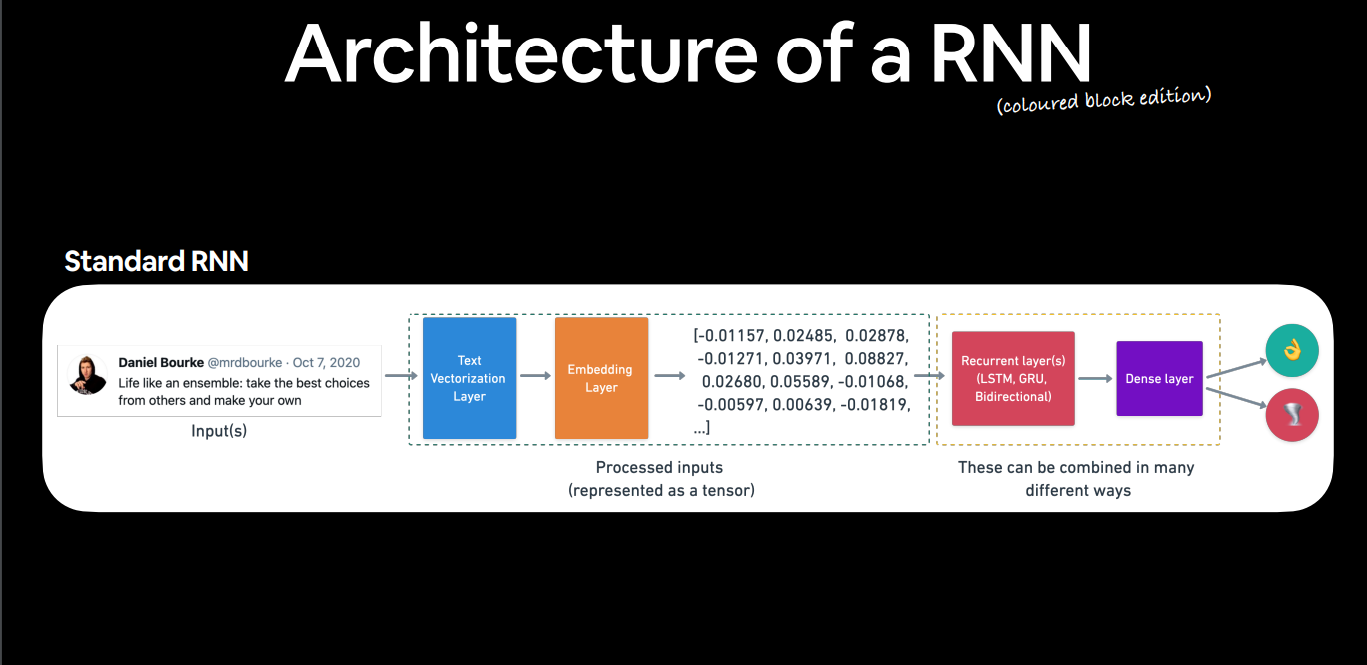

**Building an LSTM-Powered RNN**

With all this talk about what RNNs are and their applications, you're probably eager to build one. Let's dive into creating an RNN powered by **Long Short-Term Memory (LSTM)** cells.

---

**Workflow Overview**
Here's the general flow for our model:
**Input (text) -> Tokenize -> Embedding -> Layers -> Output (label probability)**

The main difference in this model is that we'll add an **LSTM layer** between the embedding and the output.

---

**Why a New Embedding Layer?**
To ensure we're not reusing trained embeddings (which could cause **data leakage** between models and lead to uneven comparisons), we'll create a new embedding layer (**`model_2_embedding`**) for our model.

However, the **`text_vectorizer`** layer can be reused because it doesn't get updated during training.

---

**🔑 Key Note**
- **Embedding Layer Independence**:  
  The embedding layer is a **learned representation of words** (as numbers).  
  If we were to use the same embedding layer (**embedding_1**) across multiple models, we'd be mixing what one model has learned with the next.  
  To keep comparisons between models fair, each model should start with its **own embedding layer**.

---

**Harnessing LSTMs in TensorFlow**
To use an LSTM in TensorFlow, we'll leverage:
```python
tensorflow.keras.layers.LSTM()


In [38]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

inputs = layers.Input(shape=(1,), dtype="string") # Input layer
x = text_vectorizer(inputs)  # Text vectorization
x = embedding(x)  # Embedding layser
x = layers.LSTM(64, return_sequences=True)(x) # First LSTM layer (returns sequences)
x = layers.LSTM(64, return_sequences=True)(x) # Second LSTM layer (also returns sequences)
x = layers.LSTM(64, activation="tanh")(x) # Third LSTM layer (no sequences returned, outputs a vector)
outputs = layers.Dense(1, activation="sigmoid")(x) # Dense output layer
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM") # Create model
model_2.summary()

Model: "model_2_LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 15, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 15, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,395,521 (5.32 MB)

 Trainable params: 1,395,521 (5.32 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
# Compile the Model 
model_2.compile(loss="binary_crossentropy" , 
               optimizer=tf.keras.optimizers.Adam() , 
               metrics = ["accuracy"])

In [42]:
# Fit the Model 
model_2_history = model_2.fit(train_sentences , 
                             train_labels , 
                             epochs = 5 , 
                             validation_data=(val_sentences , val_labels) ,
                             callbacks=[create_tensorboard_callback(SAVE_DIR,"model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20250113-195159
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.8939 - loss: 0.3004 - val_accuracy: 0.7743 - val_loss: 0.5548
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9311 - loss: 0.1777 - val_accuracy: 0.7703 - val_loss: 0.6124
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9492 - loss: 0.1416 - val_accuracy: 0.7467 - val_loss: 0.7867
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9600 - loss: 0.1116 - val_accuracy: 0.7283 - val_loss: 0.9674
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9685 - loss: 0.0864 - val_accuracy: 0.7454 - val_loss: 1.0926


In [43]:
# Make Prediction with LSTM models 
model_2_pred_probs = model_2.predict(val_sentences)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


In [44]:
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))

In [45]:
model_2_results = evaluation_metrics_tf(model=model_2 , test_pred = model_2_preds ,test_labels = val_labels )
model_2_results

{'Accuracy': np.float32(0.7454068),
 'Recall': np.float32(0.7245179),
 'Precision': np.float32(0.7366947),
 'F1-Score': np.float32(0.7305555),
 'Confusion Matrix': <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[305, 100],
        [ 94, 263]], dtype=int32)>}

In [47]:
model_1_results

{'Accuracy': np.float32(0.80052495),
 'Recall': np.float32(0.829582),
 'Precision': np.float32(0.7226891),
 'F1-Score': np.float32(0.77245504),
 'Confusion Matrix': <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[352,  53],
        [ 99, 258]], dtype=int32)>}

In [48]:
model_0_results

{'Accuracy': 0.7795275590551181,
 'Recall': 0.6050420168067226,
 'Precision': 0.8888888888888888,
 'F1-Score': 0.72,
 'Confusion Matrix': array([[378,  27],
        [141, 216]])}

### Model 3 : GRU 

**Gated Recurrent Unit (GRU)**

Another popular and effective RNN component is the **GRU** or **Gated Recurrent Unit**.

The GRU cell has similar features to an LSTM cell but with **fewer parameters**, making it computationally more efficient.

**📖 Resources:**
A full explanation of the GRU cell is beyond the scope of this notebook, but here are some resources to dive deeper:
- [Gated Recurrent Unit Wikipedia page](https://en.wikipedia.org/wiki/Gated_recurrent_unit)
- [Understanding GRU Networks by Simeon Kostadinov](https://towardsdatascience.com/understanding-gru-networks-2ef37df6c9be)

**Using GRU in TensorFlow**

To use the GRU cell in TensorFlow, you can call the `tensorflow.keras.layers.GRU()` class.

The architecture of the GRU-powered model will follow the same structure we've been using:

**Input (text) -> Tokenize -> Embedding -> Layers -> Output (label probability)**

The only difference in this case will be the layer(s) we use between the embedding and the output.

In [49]:
# Building the Layer 
from tensorflow.keras import layers 
tf.random.set_seed(42)
inputs = layers.Input(shape=(1,), dtype=tf.string) 
x = text_vectorizer(inputs)
x = embedding(x) 
x = layers.GRU(units=64 , activation='tanh' , return_sequences= True)(x)
x = layers.GRU(units=64 , activation='tanh' , return_sequences= True)(x)
x = layers.GRU(units=1 , activation='tanh')(x)
outputs = layers.Dense(units=1 , activation='sigmoid')(x)
model_3=tf.keras.Model(inputs ,outputs , name="model_3_GRU")
model_3.summary()

Model: "model_3_GRU"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 15, 64)              │          37,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 15, 64)              │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ (None, 1)                   │             201 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,342,411 (5.12 MB)

 Trainable params: 1,342,411 (5.12 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# Compiling the Model  
model_3.compile(optimizer=tf.keras.optimizers.Adam(),
               loss= tf.keras.losses.binary_crossentropy, 
               metrics=["accuracy"])

In [51]:
# fitting the above model 
model_3_history = model_3.fit(train_sentences , 
           train_labels ,
           epochs=5 , 
           validation_data=(val_sentences , val_labels) ,
           callbacks=[create_tensorboard_callback(SAVE_DIR,"model_3_GRU")])

Saving TensorBoard log files to: model_logs/model_3_GRU/20250113-195241
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9134 - loss: 0.5617 - val_accuracy: 0.7572 - val_loss: 0.5899
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9484 - loss: 0.4652 - val_accuracy: 0.7612 - val_loss: 0.5678
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9645 - loss: 0.3981 - val_accuracy: 0.7717 - val_loss: 0.5477
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9645 - loss: 0.3514 - val_accuracy: 0.7743 - val_loss: 0.5380
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9712 - loss: 0.3063 - val_accuracy: 0.7822 - val_loss: 0.5275


In [52]:
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


array([[0.19004759],
       [0.7440696 ],
       [0.19004749],
       [0.7455949 ],
       [0.1900491 ],
       [0.74551165],
       [0.19007187],
       [0.7455616 ],
       [0.19004749],
       [0.19006157],
       [0.22013476],
       [0.19591497],
       [0.19004749],
       [0.7455923 ],
       [0.19004749],
       [0.19049108],
       [0.19005024],
       [0.74558663],
       [0.74559546],
       [0.7455932 ],
       [0.19004749],
       [0.7455558 ],
       [0.7455956 ],
       [0.7455956 ],
       [0.19004835],
       [0.19004759],
       [0.19004796],
       [0.19004749],
       [0.74559546],
       [0.19176069],
       [0.19004749],
       [0.7455956 ],
       [0.19051206],
       [0.7455835 ],
       [0.19004749],
       [0.19004788],
       [0.19004749],
       [0.74559546],
       [0.26521653],
       [0.74558544],
       [0.19005539],
       [0.19004749],
       [0.7455956 ],
       [0.74559534],
       [0.74559456],
       [0.71836734],
       [0.19004954],
       [0.190

In [53]:
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0

In [54]:
model_3_results = evaluation_metrics_tf(model=model_3 , test_pred = model_3_preds , test_labels = val_labels )
model_3_results

{'Accuracy': np.float32(0.78215224),
 'Recall': np.float32(0.79384613),
 'Precision': np.float32(0.7226891),
 'F1-Score': np.float32(0.7565982),
 'Confusion Matrix': <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[338,  67],
        [ 99, 258]], dtype=int32)>}

------
**Note :** We can also stack different RNN Cells together as well .

In [55]:
# Building the Model 
import tensorflow as tf
tf.random.set_seed(42)
from tensorflow.keras import layers 

inputs = layers.Input(shape=(1,),dtype="string")
x = text_vectorizer(inputs) 
x = embedding(x) 
x = layers.GRU(units=64 , return_sequences=True)(x)
x = layers.LSTM(units=64 , return_sequences=True)(x)
x = layers.GRU(units=64)(x)
outputs = layers.Dense(units=1 , activation='sigmoid')(x)
model_3_1 = tf.keras.Model(inputs , outputs , name = "Model_3_1_GRU_LSTM")
model_3_1.summary()

Model: "Model_3_1_GRU_LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 15, 64)              │          37,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 15, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_4 (GRU)                          │ (None, 64)                  │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,375,297 (5.25 MB)

 Trainable params: 1,375,297 (5.25 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
# compiling the Model 
model_3_1.compile(optimizer=tf.keras.optimizers.Adam(), 
                 loss=tf.keras.losses.binary_crossentropy,
                 metrics=['accuracy'])

In [57]:
# Fitting the Model 
model_3_1.fit(train_sentences ,
              train_labels , 
              epochs=5 , 
              validation_data=(val_sentences , val_labels) , 
              callbacks=[create_tensorboard_callback(SAVE_DIR,"Model_3_1_GRU_LSTM")])

Saving TensorBoard log files to: model_logs/Model_3_1_GRU_LSTM/20250113-195323
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.9509 - loss: 0.2002 - val_accuracy: 0.7415 - val_loss: 0.9195
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9730 - loss: 0.0844 - val_accuracy: 0.7139 - val_loss: 1.2287
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9715 - loss: 0.0857 - val_accuracy: 0.7493 - val_loss: 1.4193
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9749 - loss: 0.0626 - val_accuracy: 0.7388 - val_loss: 1.5443
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9775 - loss: 0.0539 - val_accuracy: 0.7533 - val_loss: 1.3954


In [59]:
model_3_1_pred_probs = model_3_1(val_sentences)
model_3_1_pred_probs

<tf.Tensor: shape=(762, 1), dtype=float32, numpy=
array([[3.30739596e-04],
       [9.98330295e-01],
       [2.29474565e-04],
       [9.99480963e-01],
       [4.99302696e-04],
       [9.97052014e-01],
       [1.68318639e-03],
       [9.94748473e-01],
       [3.62911524e-04],
       [6.15268992e-03],
       [8.88824582e-01],
       [9.92368400e-01],
       [2.84946320e-04],
       [9.97687519e-01],
       [2.48691591e-04],
       [5.15235355e-04],
       [1.65201277e-01],
       [9.84809935e-01],
       [9.99855340e-01],
       [9.99528170e-01],
       [1.25339546e-04],
       [9.99247313e-01],
       [9.99809325e-01],
       [9.99705076e-01],
       [1.34728313e-03],
       [8.78725259e-04],
       [7.44566560e-01],
       [6.81518693e-04],
       [9.99577522e-01],
       [3.34445643e-03],
       [3.64613486e-04],
       [9.99876261e-01],
       [7.82046437e-01],
       [9.94654775e-01],
       [4.30730550e-04],
       [2.31295109e-01],
       [5.52636222e-04],
       [9.99796808e-01],


In [61]:
model_3_1_preds = tf.squeeze(tf.round(model_3_1_pred_probs))
model_3_1_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0

In [62]:
model_3_1_results = evaluation_metrics_tf(model=model_3_1 , test_pred = model_3_1_preds , test_labels = val_labels )

In [63]:
model_3_1_results

{'Accuracy': np.float32(0.7532808),
 'Recall': np.float32(0.7478006),
 'Precision': np.float32(0.71428573),
 'F1-Score': np.float32(0.73065895),
 'Confusion Matrix': <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[319,  86],
        [102, 255]], dtype=int32)>}

### Model 4 : BiLSTM 

In [71]:
# setting the seed
tf.random.set_seed(42)
from tensorflow.keras import layers 

# Building the Model 
inputs = layers.Input(shape=(1,) , dtype="string")
x = text_vectorizer(inputs) 
x = embedding(x) 
x = layers.Bidirectional(layers.LSTM(64 , return_sequences=True))(x)
x = layers.Bidirectional(layers.GRU(64))(x)
outputs = layers.Dense(1 , activation="sigmoid")(x)

model_4 = tf.keras.Model(inputs , outputs , name="model_4_bidirectional")
model_4.summary()

Model: "model_4_bidirectional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_6 (Bidirectional)      │ (None, 15, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_7 (Bidirectional)      │ (None, 128)                 │          74,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,453,441 (5.54 MB)

 Trainable params: 1,453,441 (5.54 MB)

 Non-trainable params: 0 (0.00 B)

In [72]:
# Compiling the Model 
model_4.compile(optimizer=tf.keras.optimizers.Adam(), 
               loss= tf.keras.losses.binary_crossentropy, 
               metrics=["accuracy"])

In [77]:
# fitting the Model 
model_4_history = model_4.fit(train_sentences , train_labels , epochs=5 , validation_data=(val_sentences , val_labels) , callbacks=[create_tensorboard_callback(SAVE_DIR,"Model_4_Bidirectional")])

Saving TensorBoard log files to: model_logs/Model_4_Bidirectional/20250113-215154
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9813 - loss: 0.0403 - val_accuracy: 0.7467 - val_loss: 1.7416
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9808 - loss: 0.0404 - val_accuracy: 0.7467 - val_loss: 1.8156
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9807 - loss: 0.0380 - val_accuracy: 0.7402 - val_loss: 1.8930
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9816 - loss: 0.0388 - val_accuracy: 0.7493 - val_loss: 1.6445
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9824 - loss: 0.0382 - val_accuracy: 0.7454 - val_loss: 1.6728


In [78]:
model_4_preds_probs = model_4.predict(val_sentences)
model_4_preds_probs

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


array([[2.06601580e-05],
       [9.87234116e-01],
       [1.68590941e-05],
       [9.99982774e-01],
       [3.84344057e-05],
       [9.99870718e-01],
       [2.22238072e-04],
       [9.98724461e-01],
       [5.62871173e-06],
       [3.39199469e-04],
       [3.34132300e-03],
       [3.87599021e-01],
       [1.42683621e-05],
       [9.99972880e-01],
       [1.49142261e-05],
       [4.25575476e-04],
       [2.21916586e-01],
       [3.18935588e-02],
       [9.99994814e-01],
       [9.99968410e-01],
       [4.83476288e-06],
       [9.99564290e-01],
       [9.99989331e-01],
       [9.99993920e-01],
       [2.12980318e-04],
       [1.34170160e-01],
       [3.46392930e-01],
       [2.10248818e-05],
       [9.99992490e-01],
       [1.13167372e-02],
       [9.26843204e-05],
       [9.99962091e-01],
       [1.53241798e-01],
       [9.75049138e-01],
       [2.69541051e-05],
       [1.99812945e-04],
       [2.31802278e-05],
       [9.99990821e-01],
       [3.47132176e-01],
       [9.99984801e-01],


In [79]:
model_4_preds = tf.squeeze(tf.round(model_4_preds_probs))
model_4_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0

In [80]:
model_4_results = evaluation_metrics_tf(test_pred= model_4_preds, test_labels = val_labels , model=model_4)
model_4_results

{'Accuracy': np.float32(0.7454068),
 'Recall': np.float32(0.78397214),
 'Precision': np.float32(0.6302521),
 'F1-Score': np.float32(0.6987577),
 'Confusion Matrix': <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[343,  62],
        [132, 225]], dtype=int32)>}